## Import all the needed packages

In [2]:
%matplotlib inline

# DataFrame
import pandas as pd

# Elasticsearch
# from elasticsearch import Elasticsearch, helpers

# datetime
from datetime import datetime

# isnan()
import math

# plot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Begin to experiment anomaly detection approaches

1.  MWT2_a -> MWT2_b


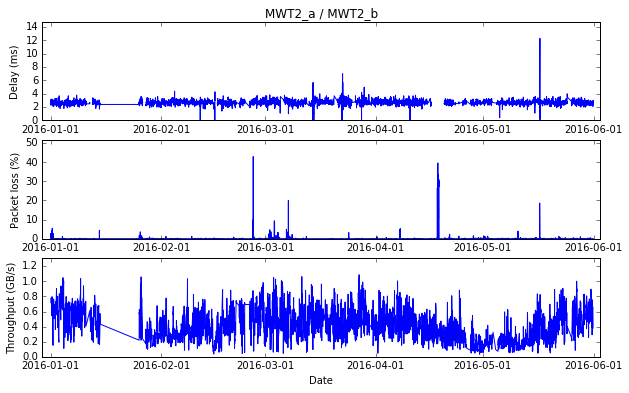

2.  MWT2_a -> MWT2_c


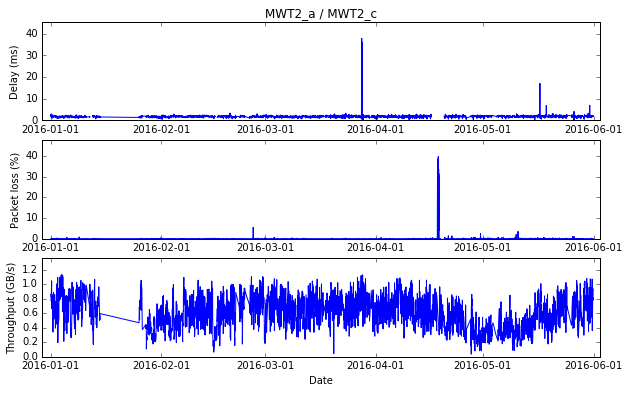

3.  MWT2_a -> SFU


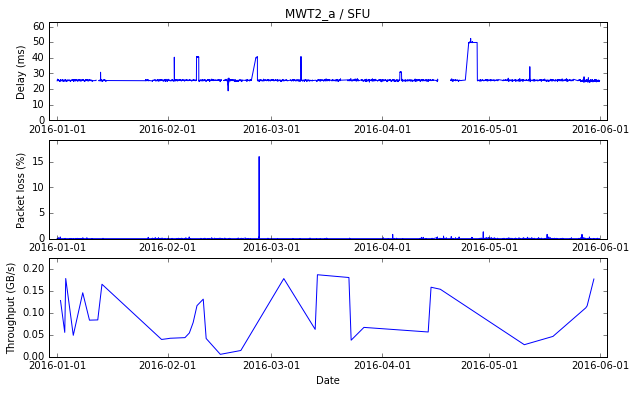

4.  MWT2_a -> CERN


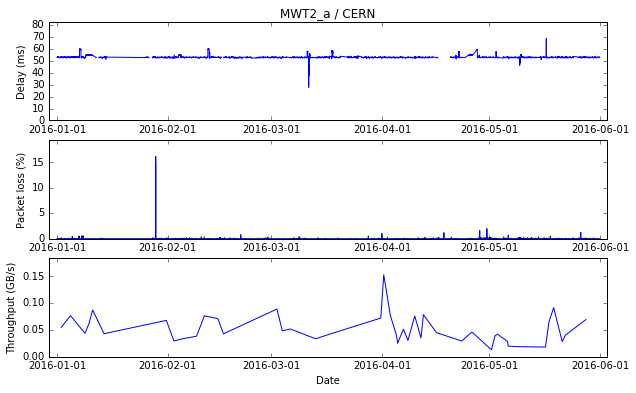

5.  MWT2_a -> BEIJING


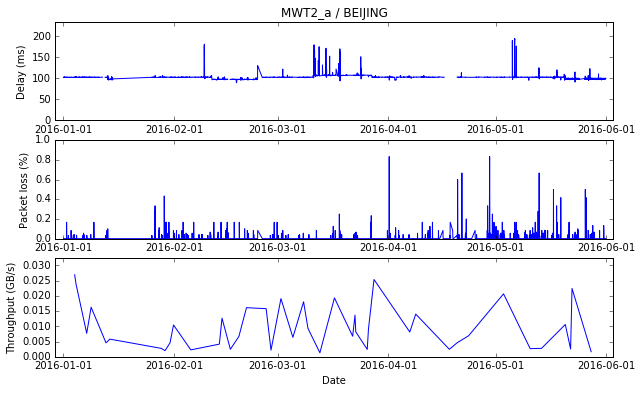

6.  MWT2_b -> MWT2_a


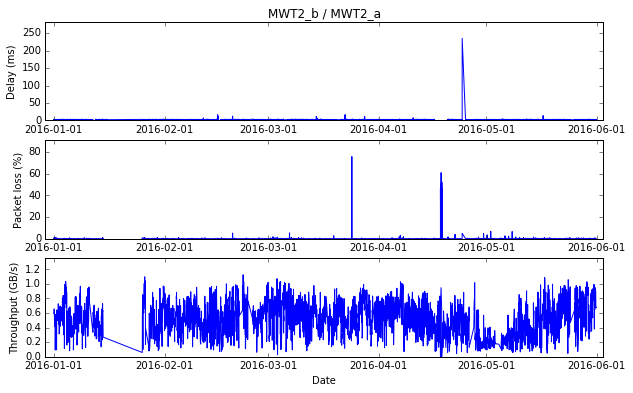

7.  MWT2_b -> MWT2_c


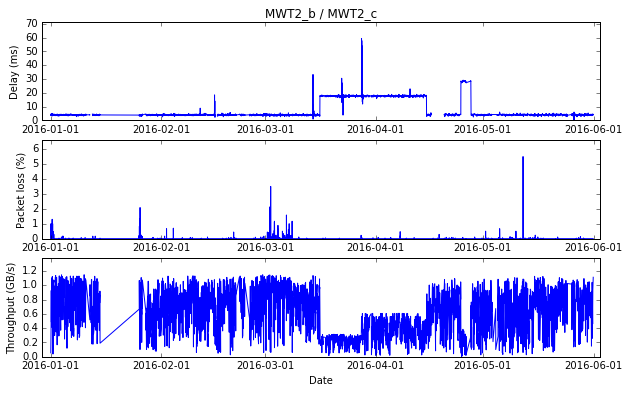

8.  MWT2_b -> SFU


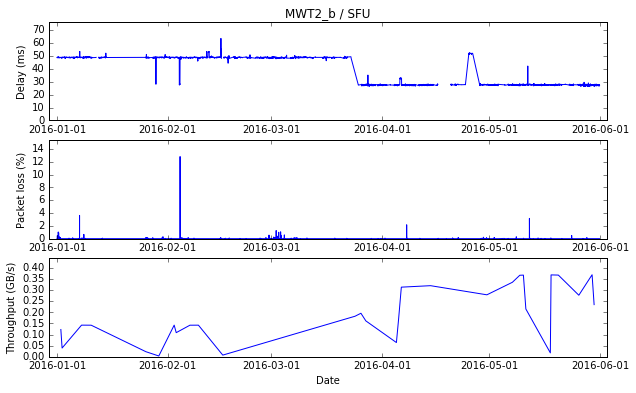

9.  MWT2_b -> CERN


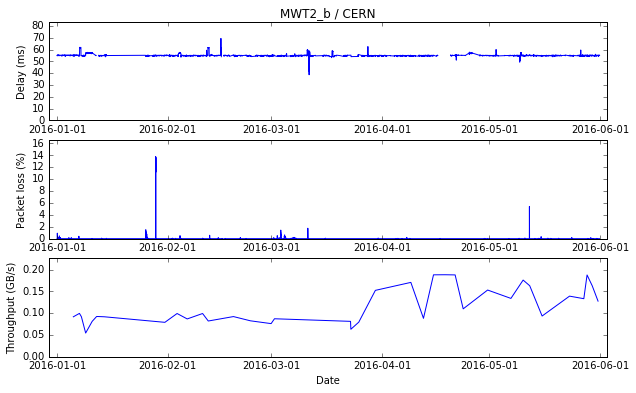

10.  MWT2_b -> BEIJING


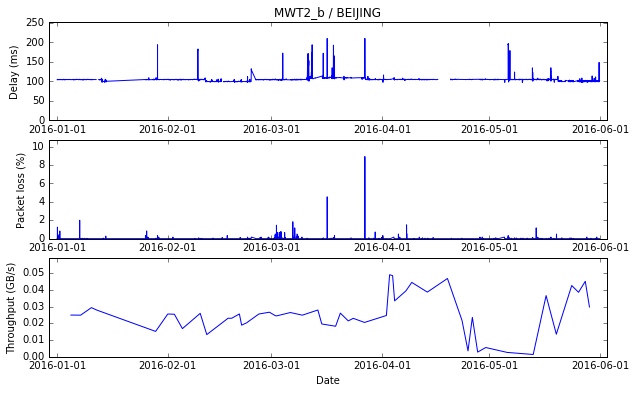

11.  MWT2_c -> MWT2_a


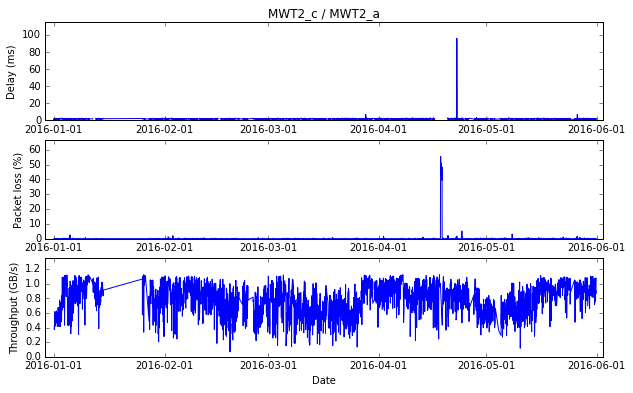

12.  MWT2_c -> MWT2_b


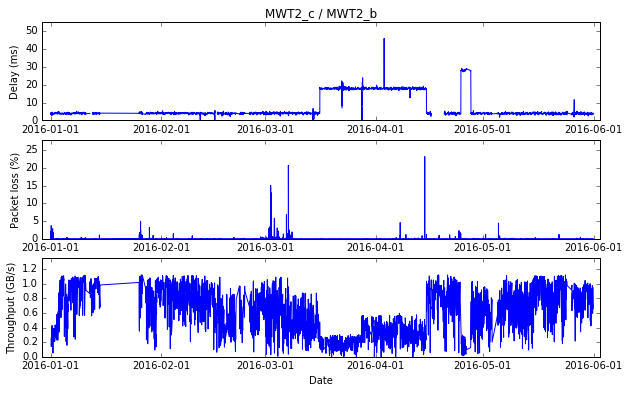

13.  MWT2_c -> SFU


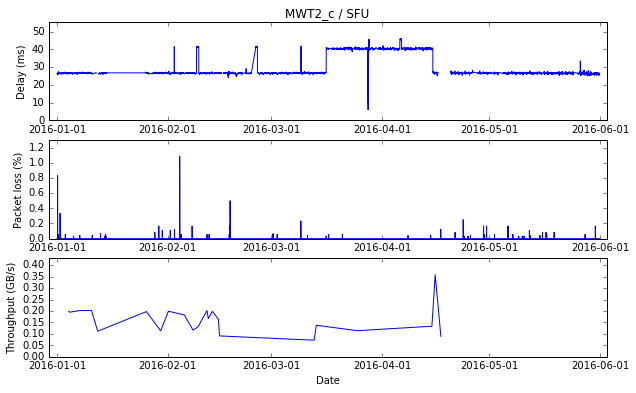

14.  MWT2_c -> CERN


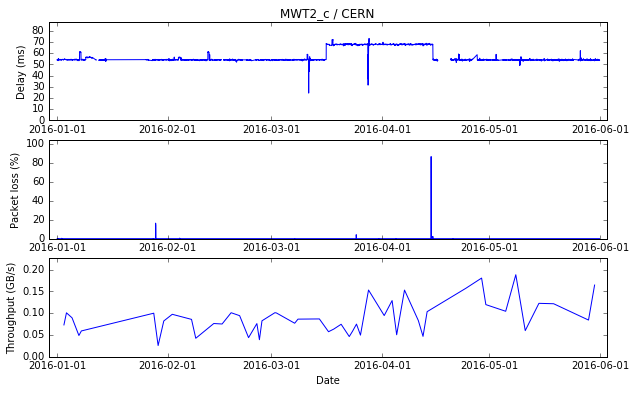

15.  MWT2_c -> BEIJING


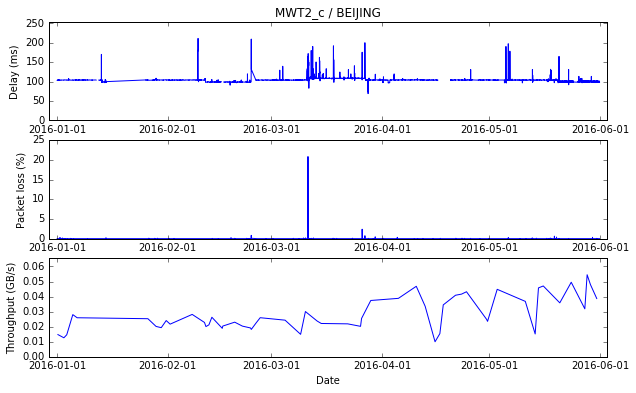

16.  SFU -> MWT2_a


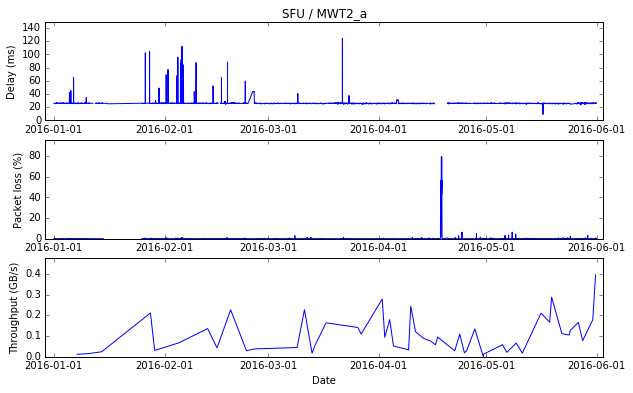

17.  SFU -> MWT2_b


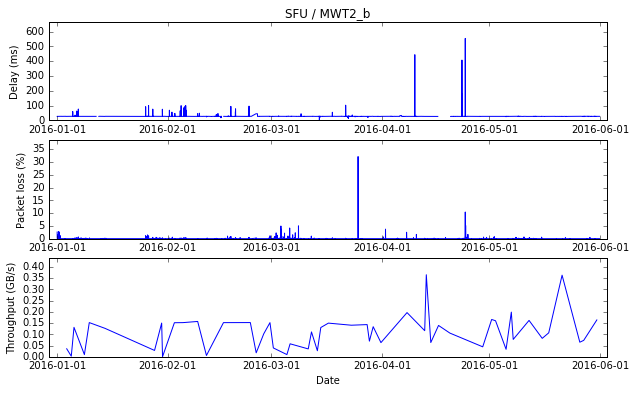

18.  SFU -> MWT2_c


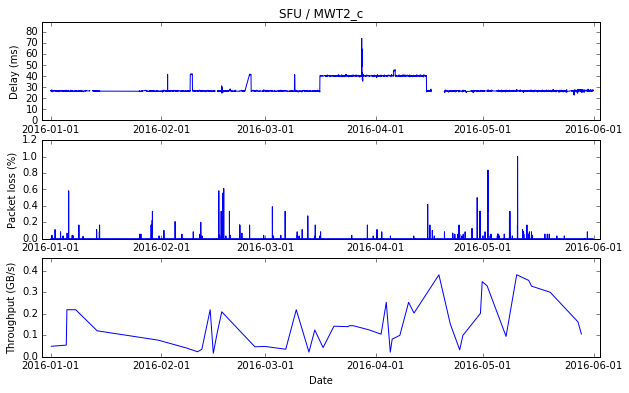

19.  SFU -> CERN


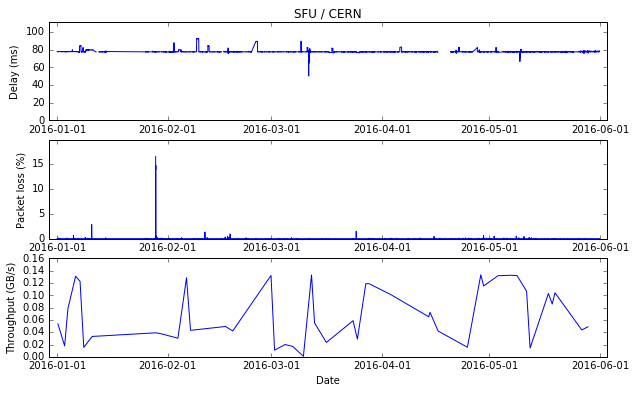

20.  SFU -> BEIJING


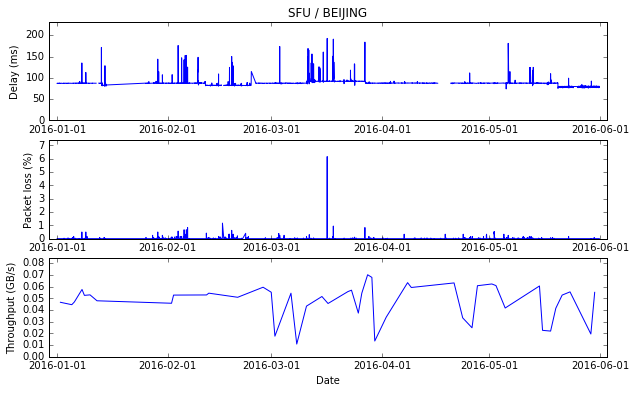

21.  CERN -> MWT2_a


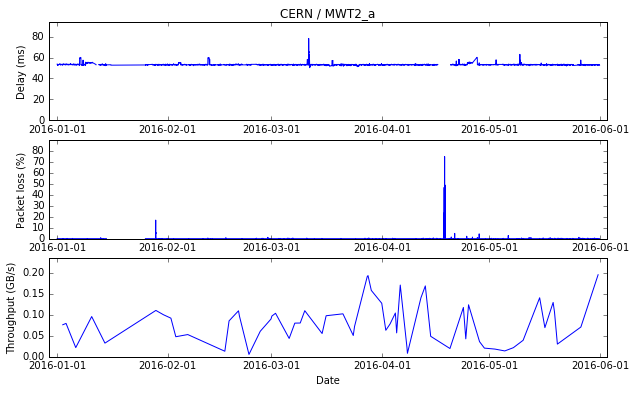

22.  CERN -> MWT2_b


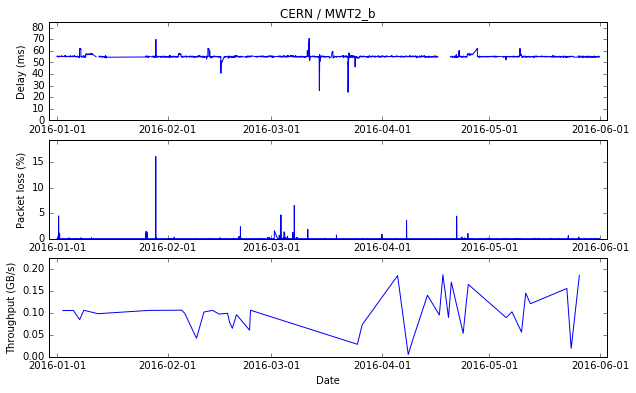

23.  CERN -> MWT2_c


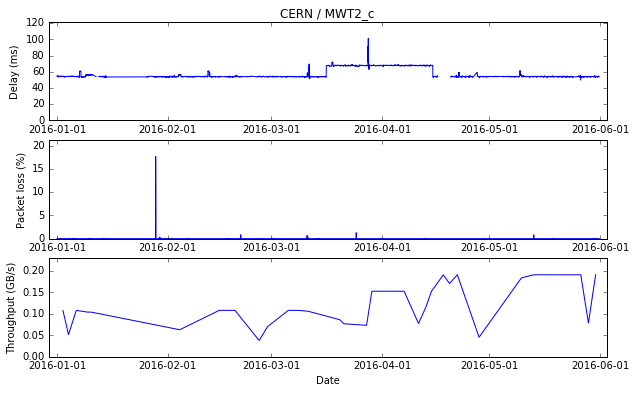

24.  CERN -> SFU


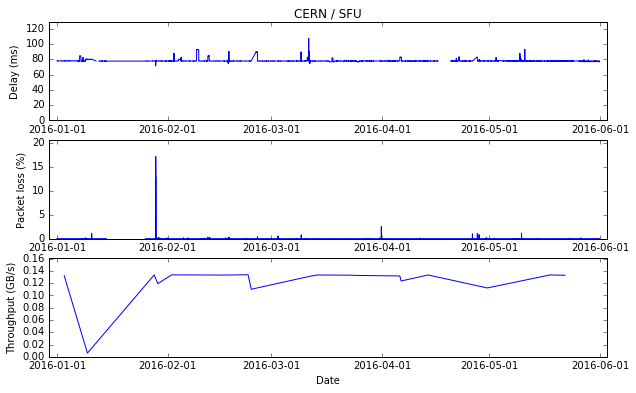

25.  CERN -> BEIJING


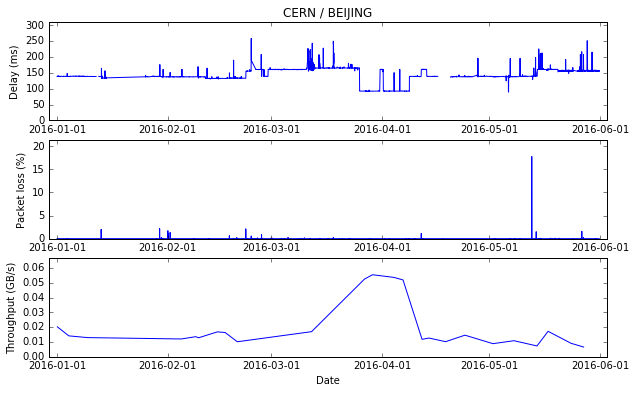

26.  BEIJING -> MWT2_a


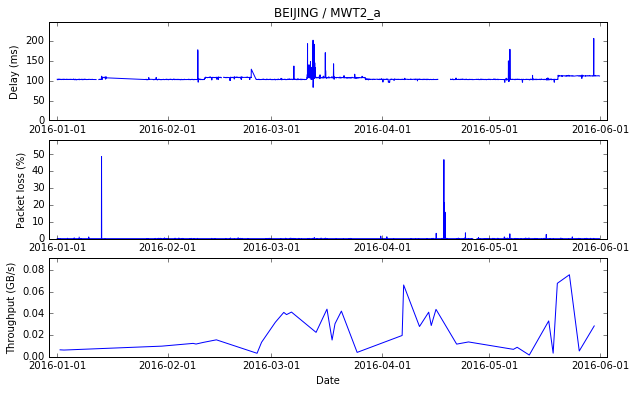

27.  BEIJING -> MWT2_b


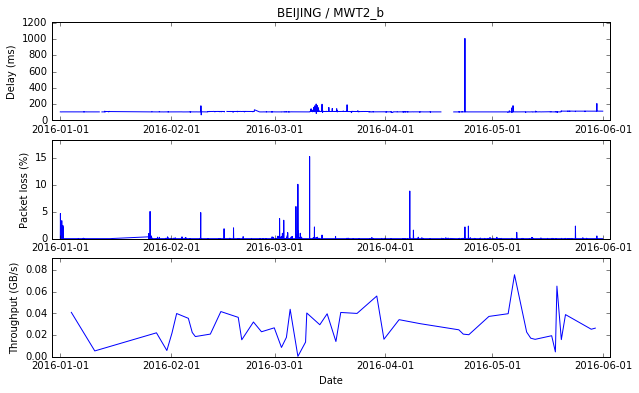

28.  BEIJING -> MWT2_c


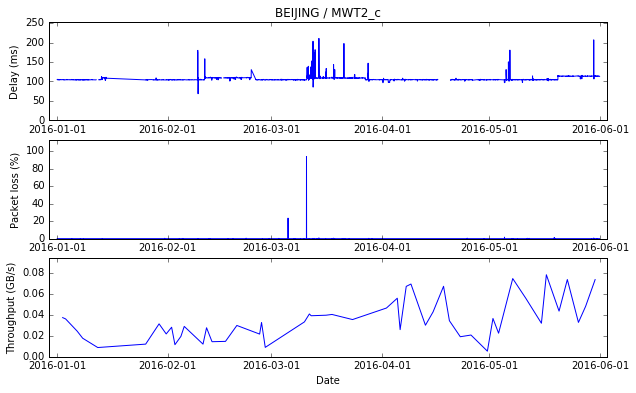

29.  BEIJING -> SFU


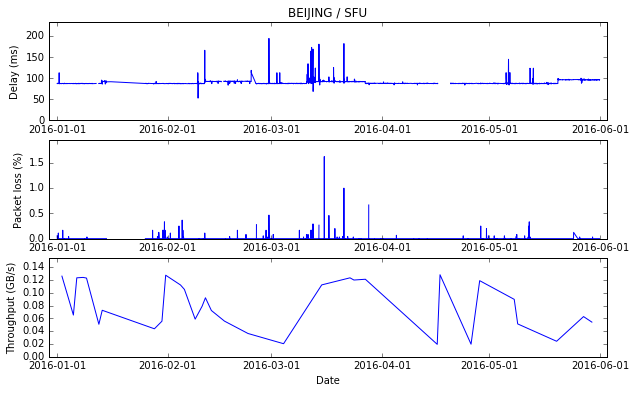

30.  BEIJING -> CERN


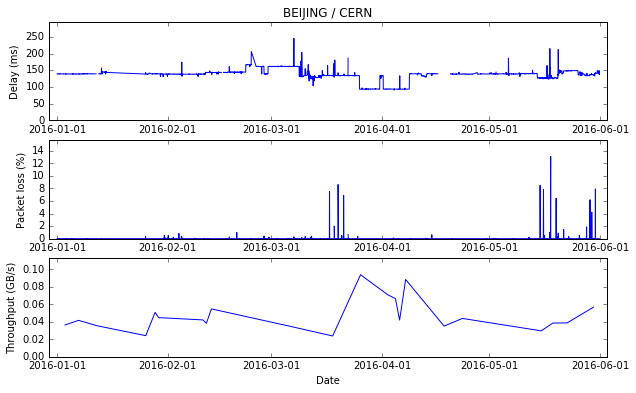

In [3]:
name_list = ['MWT2_a', 'MWT2_b', 'MWT2_c', 'SFU', 'CERN', 'BEIJING']
ip_list_lpl = ['192.170.227.160', '149.165.225.223', '72.36.96.4', '206.12.24.251', '128.142.223.247', '202.122.32.170']
ip_list_t = ['192.170.227.162', '149.165.225.224', '72.36.96.9', '206.12.24.250', '128.142.223.246', '202.122.32.166']

countbig = 0
for src_i in range(6):
    for dest_i in range(6):
        if src_i != dest_i:
            countbig += 1
            print('{}.  {} -> {}'.format(countbig, name_list[src_i], name_list[dest_i]))
            data_lpl = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_lpl[src_i], ip_list_lpl[dest_i]))
            data_t = pd.read_pickle('My_data/week0708_clean_from_{}_to_{}.pkl'.format(ip_list_t[src_i], ip_list_t[dest_i]))
            
            x = [1451606400000, 1454284800000, 1456790400000, 1459468800000, 1462060800000, 1464739200000]
            lbl = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01']
            
            time_lpl = data_lpl.index
            dm = data_lpl.delay_median
            pl = data_lpl.packet_loss * 100
            
            time_t = data_t.index
            tp = data_t.throughput / 1024 / 1024 / 1024 / 8
            
            plt.figure(figsize=[10, 6])
            
            plt.subplot(3, 1, 1)
            plt.plot(time_lpl, dm, label='delay (ms)')
            plt.ylabel('Delay (ms)')
            plt.ylim([0, dm.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.title('{} / {}'.format(name_list[src_i], name_list[dest_i]))
            
            plt.subplot(3, 1, 2)
            plt.plot(time_lpl, pl, label='packet loss (%)')
            plt.ylabel('Packet loss (%)')
            plt.ylim([0, pl.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.subplot(3, 1, 3)
            plt.plot(time_t, tp, label='throughput (GB/s)')
            plt.ylabel('Throughput (GB/s)')
            plt.ylim([0, tp.max() * 1.2])
            plt.xlim([1451400000000, 1464900000000])
            plt.xticks(x, lbl, rotation=0)
            
            plt.xlabel('Date')
            
            plt.show()